In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import glob

In [2]:
filenames = glob.glob('Datathon*.csv')

In [3]:
pre_dat = pd.DataFrame({})
for ind, filename in enumerate(filenames):
    print(ind)
    tmp_dat = pd.read_csv(filename)
    pre_dat = pre_dat.append(tmp_dat)    
pre_dat.columns = ['BET_ID', 'BET_TRANS_ID', 'MATCH_BET_ID', 'ACCOUNT_ID',
       'COUNTRY_OF_RESIDENCE_NAME', 'PARENT_EVENT_ID', 'EVENT_ID', 'MATCH',
       'EVENT_NAME', 'EVENT_DT', 'OFF_DT', 'BID_TYP', 'STATUS_ID',
       'PLACED_DATE', 'TAKEN_DATE', 'SETTLED_DATE', 'CANCELLED_DATE',
       'SELECTION_NAME', 'PERSISTENCE_TYPE', 'BET_PRICE', 'PRICE_TAKEN',
       'INPLAY_BET', 'BET_SIZE', 'PROFIT_LOSS']
peek_dat = pd.read_csv('DSMDatathon_samplefile.txt', sep='\t')
pre_dat = peek_dat.append(pre_dat)

0
1

/Users/feizhan/miniconda/envs/py3_env/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/feizhan/miniconda/envs/py3_env/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)



2
3
4


In [4]:
pre_dat.loc[:, 'BID_TYP'] = pre_dat.loc[:, 'BID_TYP'].str.strip(' ')
pre_dat.loc[:, 'STATUS_ID'] = pre_dat.loc[:, 'STATUS_ID'].str.strip(' ')

In [7]:
pre_dat.columns

Index(['BET_ID', 'BET_TRANS_ID', 'MATCH_BET_ID', 'ACCOUNT_ID',
       'COUNTRY_OF_RESIDENCE_NAME', 'PARENT_EVENT_ID', 'EVENT_ID', 'MATCH',
       'EVENT_NAME', 'EVENT_DT', 'OFF_DT', 'BID_TYP', 'STATUS_ID',
       'PLACED_DATE', 'TAKEN_DATE', 'SETTLED_DATE', 'CANCELLED_DATE',
       'SELECTION_NAME', 'PERSISTENCE_TYPE', 'BET_PRICE', 'PRICE_TAKEN',
       'INPLAY_BET', 'BET_SIZE', 'PROFIT_LOSS'],
      dtype='object')

In [9]:
pre_dat = pre_dat.loc[(pre_dat.STATUS_ID == 'S').values]

In [10]:
pre_dat.loc[:, 'TAKEN_DATE'] = pd.to_datetime(pre_dat.loc[:, 'TAKEN_DATE'],
                                              dayfirst=True,
                                              infer_datetime_format=True)

In [11]:
# have study on odds dynamics
def plot_odds_dynamics(game, bid_typ, from_time=None):
    pattern = '(?P<team1>.*) v (?P<team2>.*)'
    search_team = re.search(pattern, game)
    team1 = search_team.groupdict()['team1']
    team2 = search_team.groupdict()['team2']
    game_dat = pre_dat.loc[(pre_dat.MATCH == game).values, :]
    game_dat = game_dat.loc[:, ['BID_TYP', 'SELECTION_NAME', 'TAKEN_DATE', 'PRICE_TAKEN']]
    game_dat = game_dat.sort('TAKEN_DATE')
    game_dat = game_dat.set_index('TAKEN_DATE')
    if from_time is not None:
        back_game_dat = game_dat.loc[(game_dat.BID_TYP == bid_typ).values].loc[from_time:]
    else:
        back_game_dat = game_dat.loc[(game_dat.BID_TYP == bid_typ).values]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax = back_game_dat.loc[(back_game_dat.SELECTION_NAME == team1).values,
                           'PRICE_TAKEN'].plot(kind='line', logy=True, label=team1)
    back_game_dat.loc[(back_game_dat.SELECTION_NAME == team2).values,
                      'PRICE_TAKEN'].plot(kind='line', logy=True, ax=ax, color='r', label=team2)
    plt.legend(bbox_to_anchor=(.05, .99), loc=2)

In [15]:
pre_dat.MATCH.unique()

array(['New Zealand v Sri Lanka', 'India v Pakistan',
       'South Africa v Zimbabwe', 'Ireland v West Indies',
       'New Zealand v Scotland', 'Bangladesh v Afghanistan',
       'Zimbabwe v United Arab Emirates', 'England v New Zealand',
       'Sri Lanka v Afghanistan', 'Pakistan v West Indies',
       'South Africa v India', 'England v Scotland',
       'West Indies v Zimbabwe', 'Ireland v United Arab Emirates',
       'Afghanistan v Scotland', 'Sri Lanka v Bangladesh',
       'South Africa v West Indies', 'India v United Arab Emirates',
       'Australia v New Zealand', 'England v Sri Lanka',
       'Pakistan v Zimbabwe', 'South Africa v Ireland',
       'Pakistan v United Arab Emirates', 'Australia v Afghanistan',
       'Bangladesh v Scotland', 'India v West Indies',
       'South Africa v Pakistan', 'Zimbabwe v Ireland',
       'Australia v Sri Lanka', 'New Zealand v Afghanistan',
       'Bangladesh v New Zealand', 'Sri Lanka v Scotland',
       'South Africa v United Arab Emi

In [93]:
pre_dat.MATCH.nunique()

44

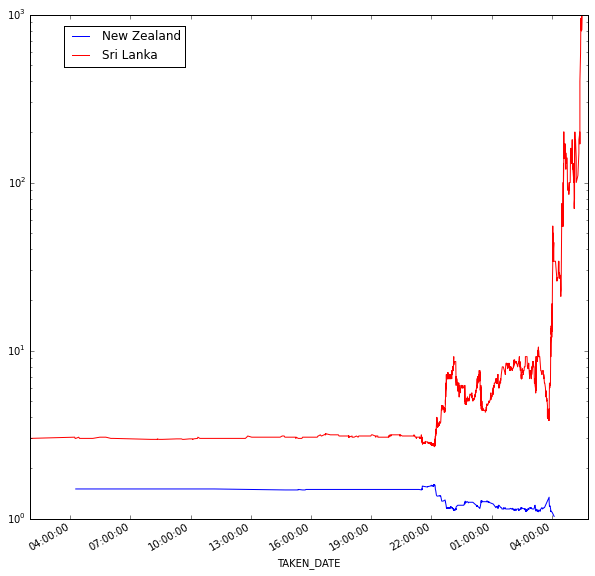

In [14]:
plot_odds_dynamics('New Zealand v Sri Lanka', 'L', '2015-02-13')

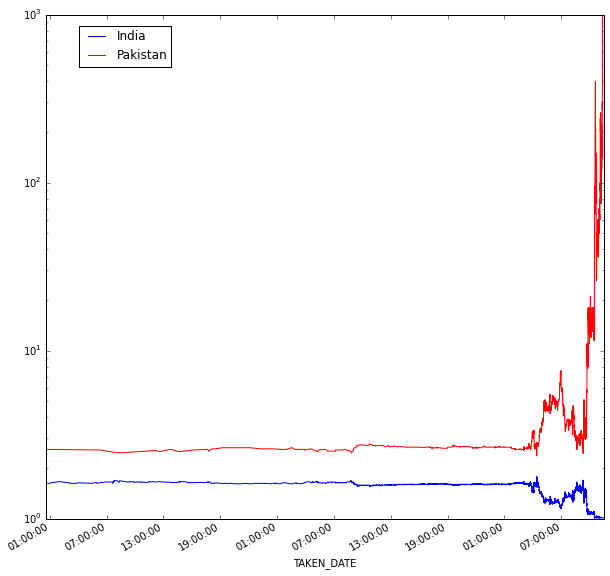

In [18]:
plot_odds_dynamics('India v Pakistan', 'L', '2015-02-13')

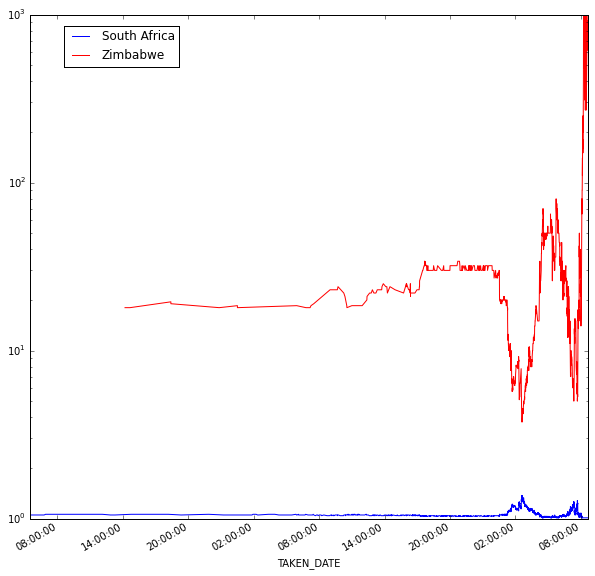

In [19]:
plot_odds_dynamics('South Africa v Zimbabwe', 'L', '2015-02-13')

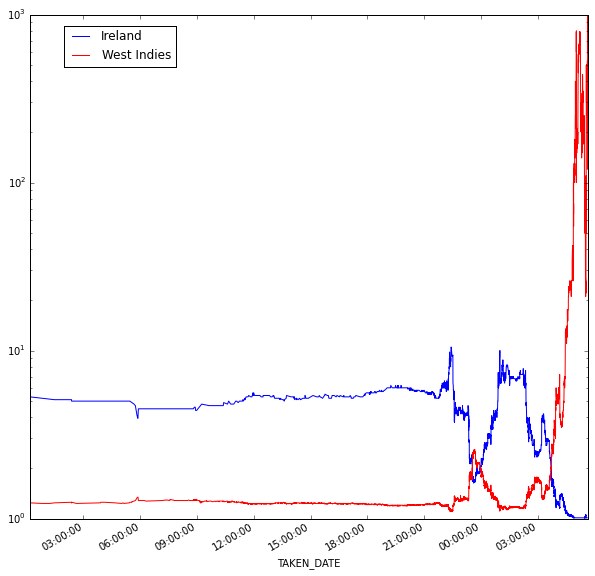

In [22]:
plot_odds_dynamics('Ireland v West Indies', 'L', '2015-02-15')

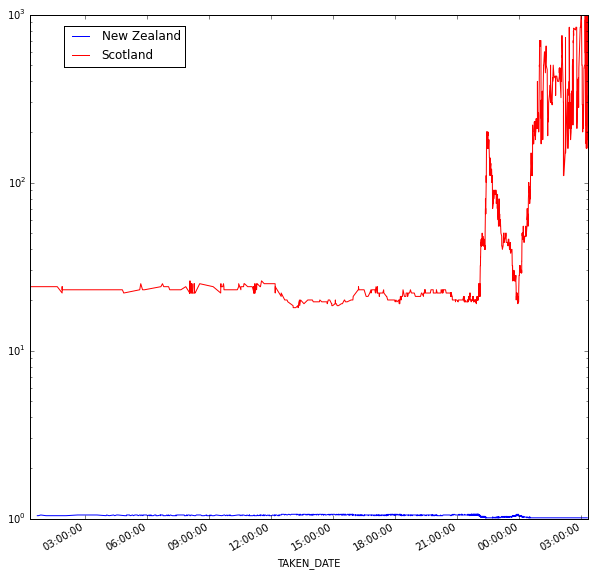

In [24]:
plot_odds_dynamics('New Zealand v Scotland', 'L', '2015-02-16')

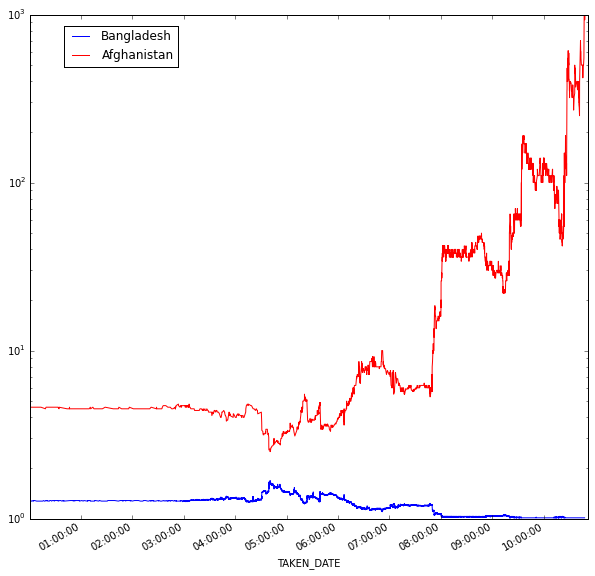

In [26]:
plot_odds_dynamics('Bangladesh v Afghanistan', 'L', '2015-02-18')

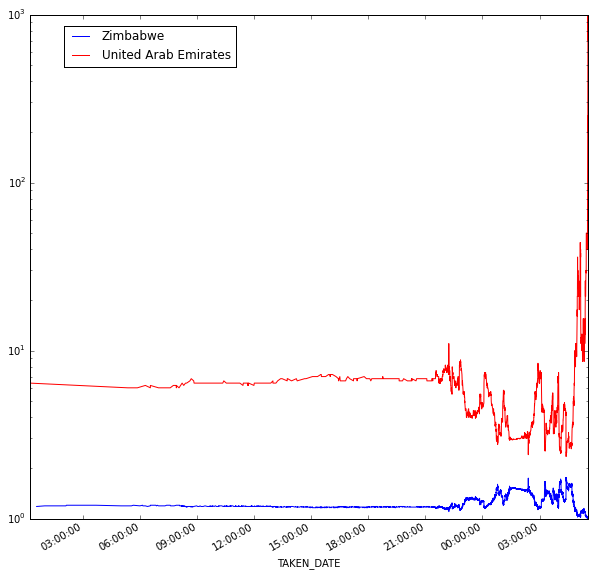

In [27]:
plot_odds_dynamics('Zimbabwe v United Arab Emirates', 'L', '2015-02-18')

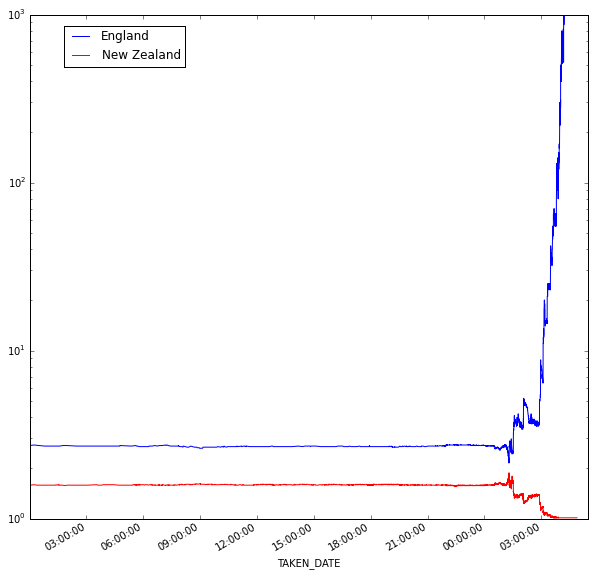

In [29]:
plot_odds_dynamics('England v New Zealand', 'L', '2015-02-19')

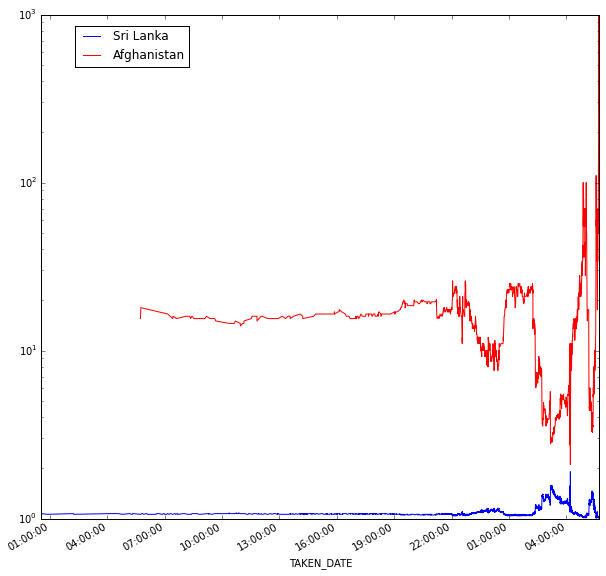

In [31]:
plot_odds_dynamics('Sri Lanka v Afghanistan', 'L', '2015-02-21')

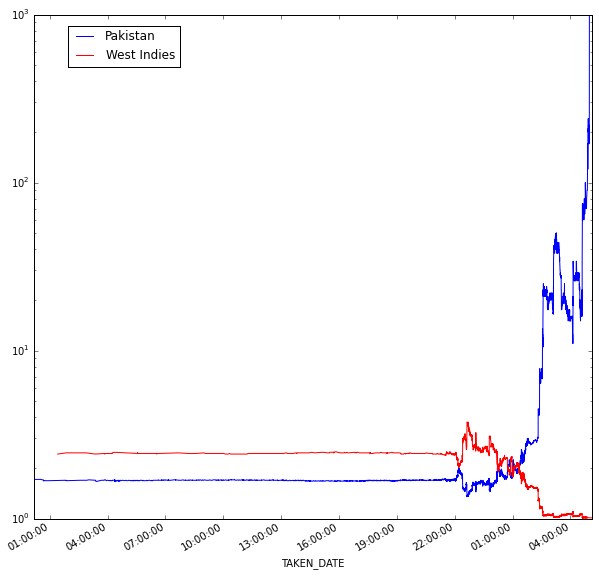

In [34]:
plot_odds_dynamics('Pakistan v West Indies', 'L', '2015-02-20')

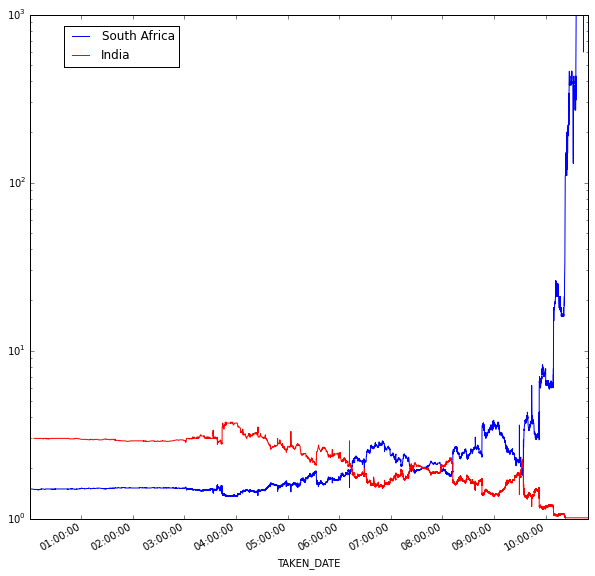

In [37]:
plot_odds_dynamics('South Africa v India', 'L', '2015-02-22')

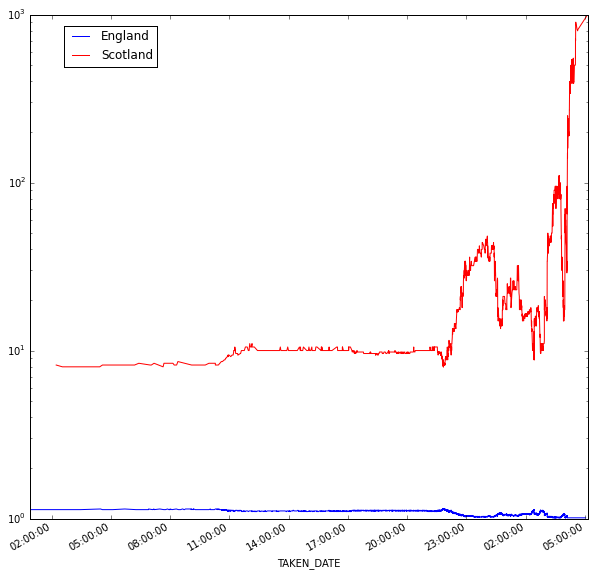

In [39]:
plot_odds_dynamics('England v Scotland', 'L', '2015-02-22')

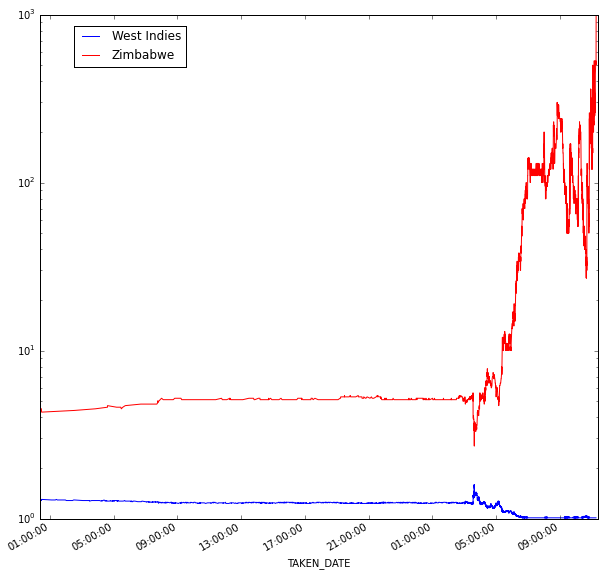

In [41]:
plot_odds_dynamics('West Indies v Zimbabwe', 'L', '2015-02-23')

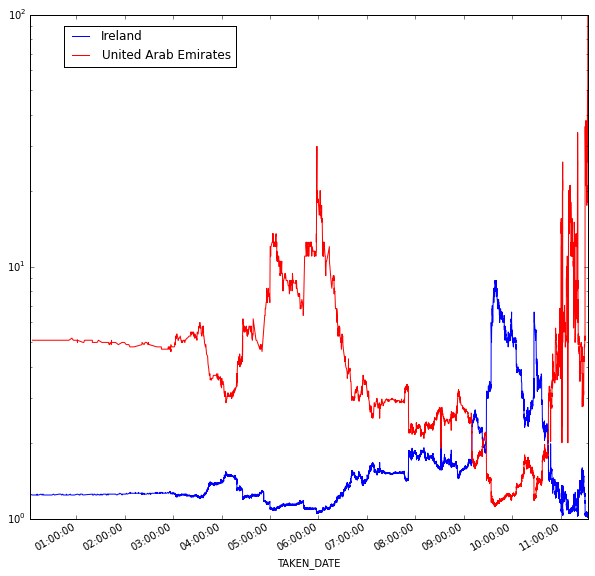

In [43]:
plot_odds_dynamics('Ireland v United Arab Emirates', 'L', '2015-02-25')

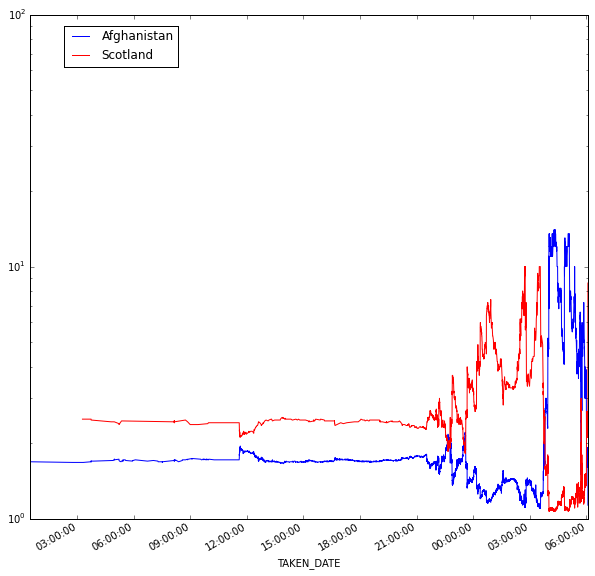

In [46]:
plot_odds_dynamics('Afghanistan v Scotland', 'L', '2015-02-25')

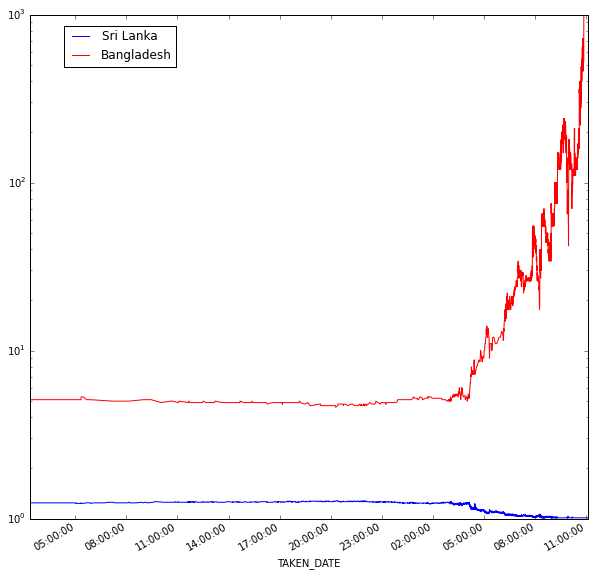

In [48]:
plot_odds_dynamics( 'Sri Lanka v Bangladesh', 'L', '2015-02-25')

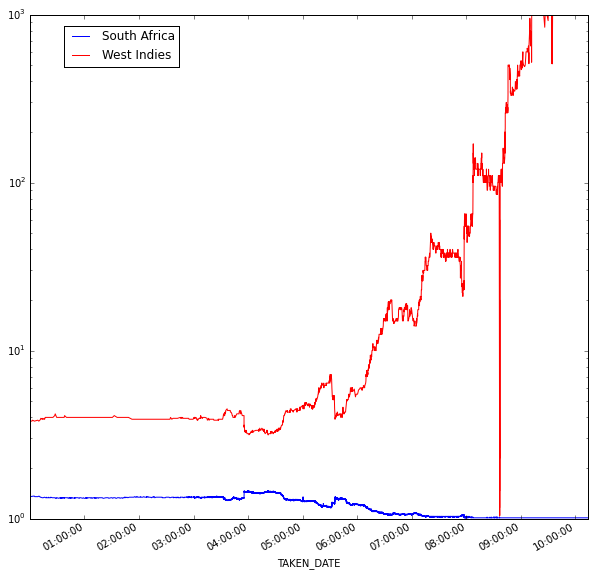

In [50]:
plot_odds_dynamics('South Africa v West Indies', 'L', '2015-02-27')

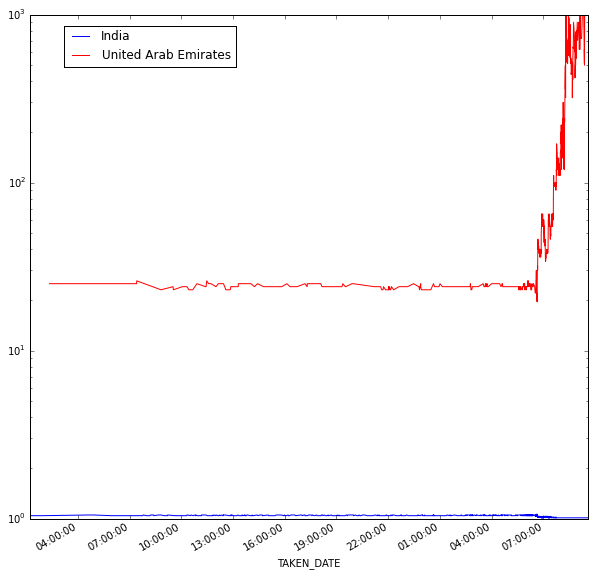

In [51]:
plot_odds_dynamics('India v United Arab Emirates', 'L', '2015-02-27')

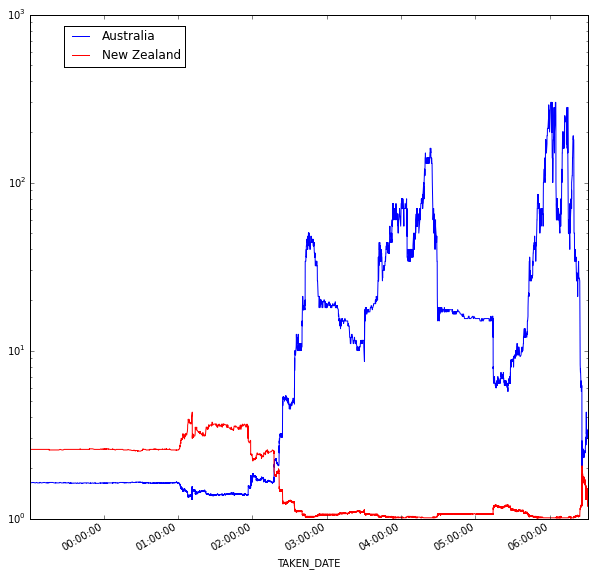

In [53]:
plot_odds_dynamics('Australia v New Zealand','L', '2015-02-27 23:00:00')

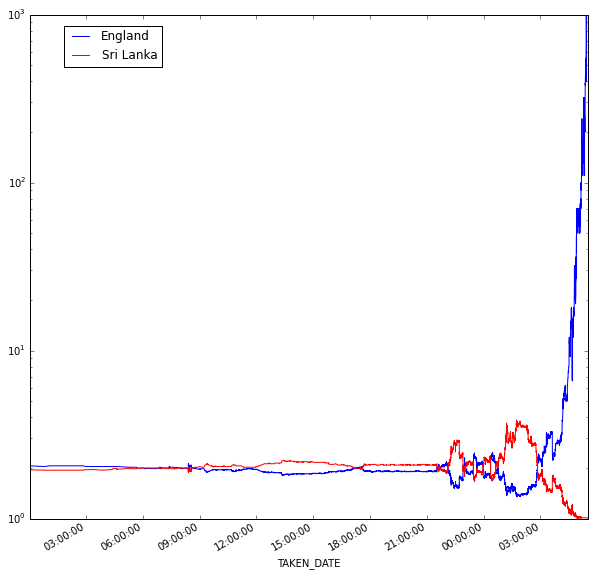

In [54]:
plot_odds_dynamics('England v Sri Lanka', 'L', '2015-02-28')

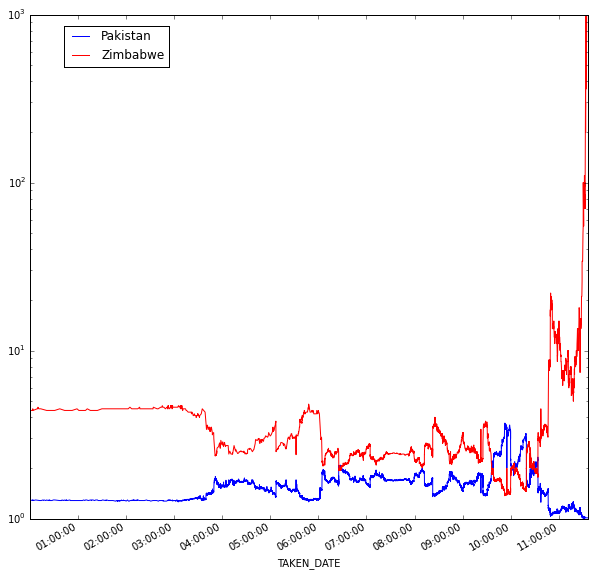

In [56]:
plot_odds_dynamics('Pakistan v Zimbabwe', 'L', '2015-03-01')

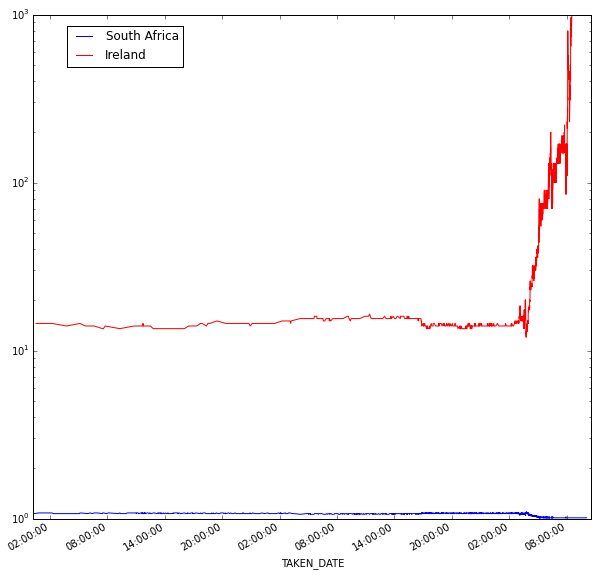

In [57]:
plot_odds_dynamics('South Africa v Ireland', 'L', '2015-03-01')

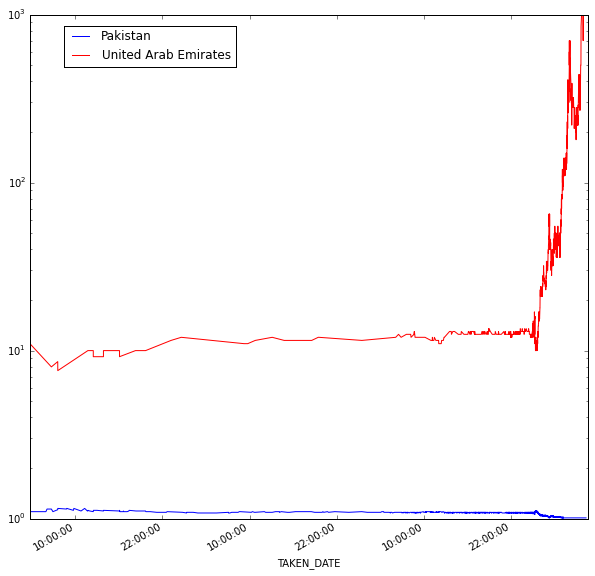

In [58]:
plot_odds_dynamics('Pakistan v United Arab Emirates', 'L', '2015-03-01')

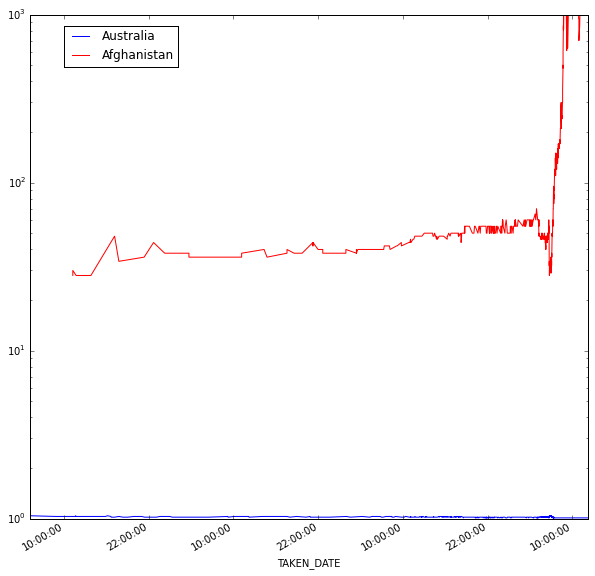

In [59]:
plot_odds_dynamics( 'Australia v Afghanistan', 'L', '2015-03-01')

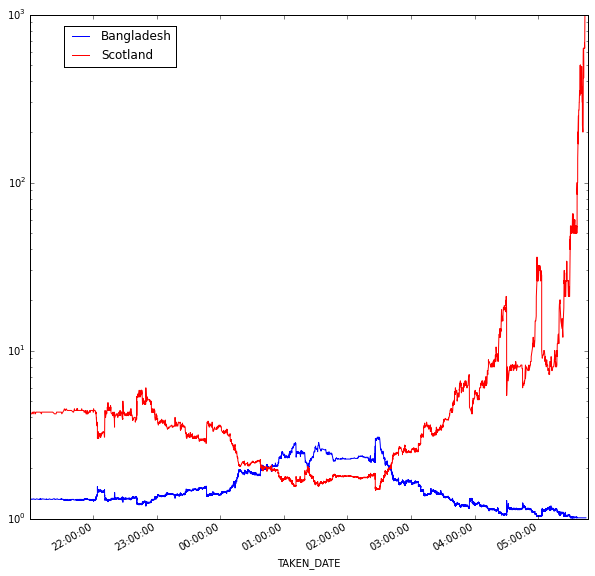

In [63]:
plot_odds_dynamics('Bangladesh v Scotland',  'L', '2015-03-04 21:00:00')

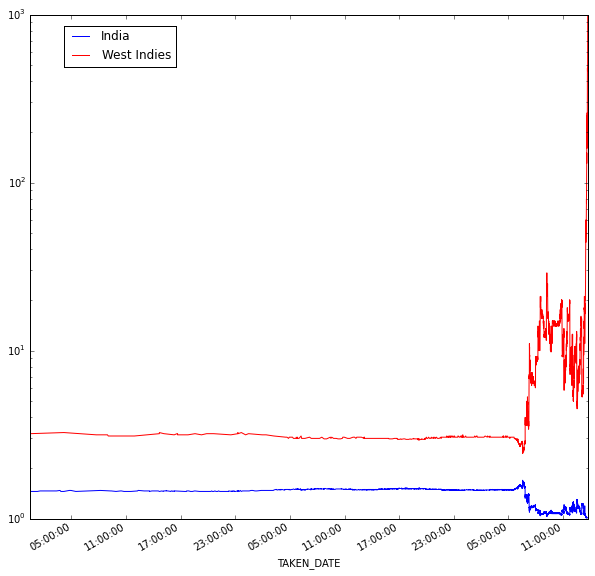

In [64]:
plot_odds_dynamics('India v West Indies', 'L', '2015-03-04')

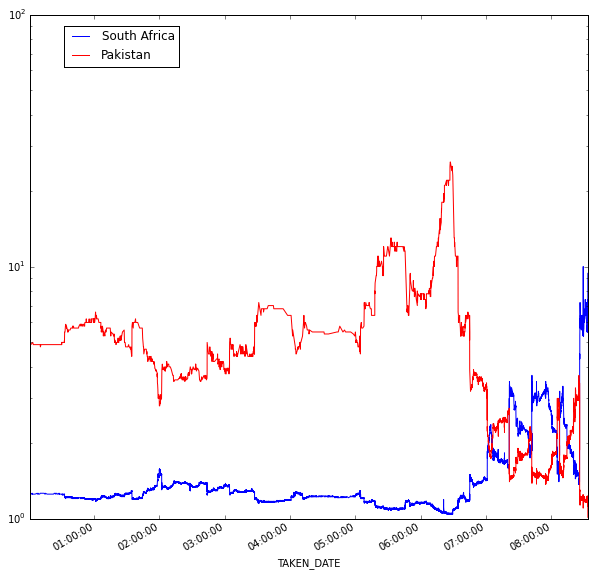

In [67]:
plot_odds_dynamics('South Africa v Pakistan', 'L', '2015-03-07')

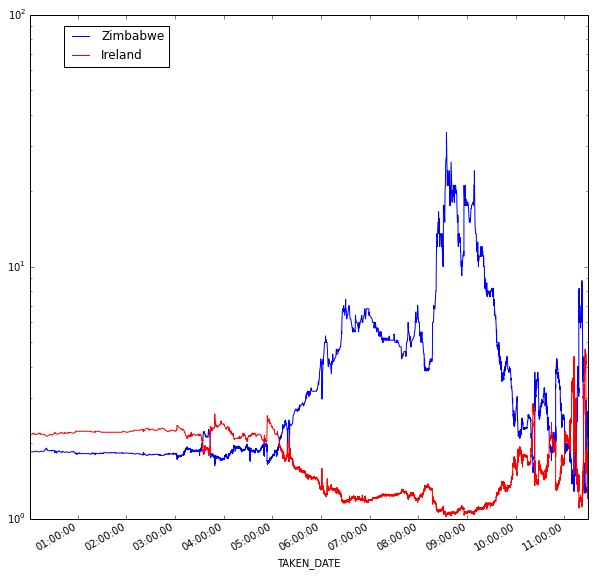

In [68]:
plot_odds_dynamics('Zimbabwe v Ireland', 'L', '2015-03-07')

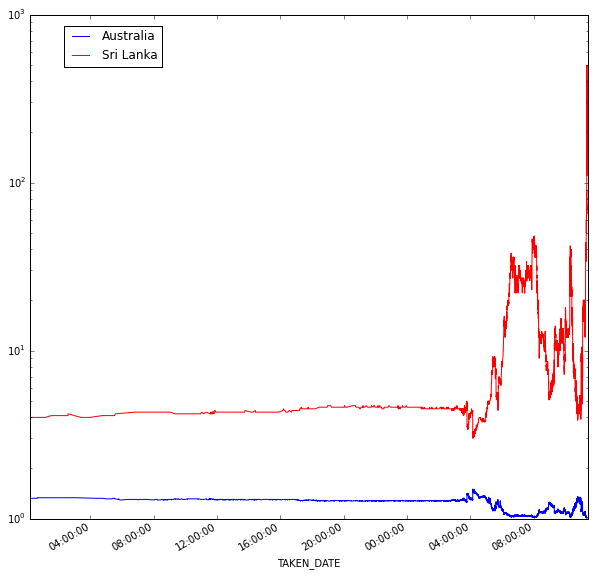

In [69]:
plot_odds_dynamics('Australia v Sri Lanka', 'L', '2015-03-07')

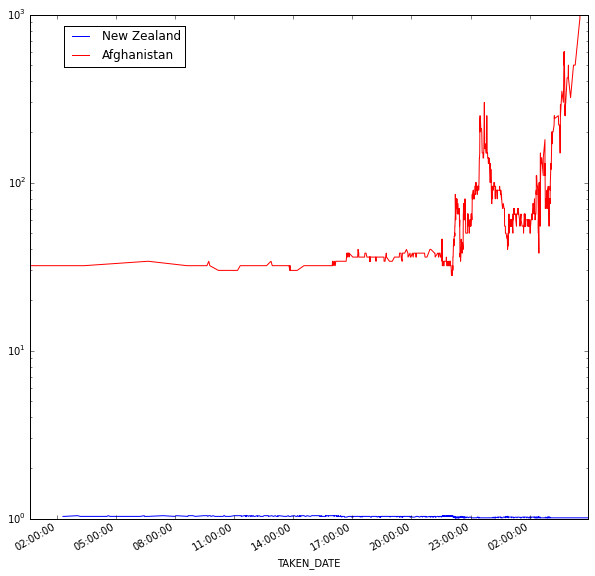

In [70]:
plot_odds_dynamics('New Zealand v Afghanistan', 'L', '2015-03-07')

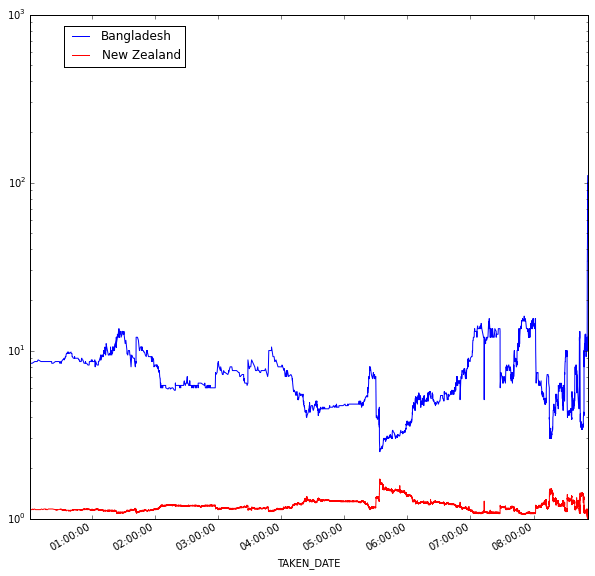

In [72]:
plot_odds_dynamics('Bangladesh v New Zealand', 'L', '2015-03-13')

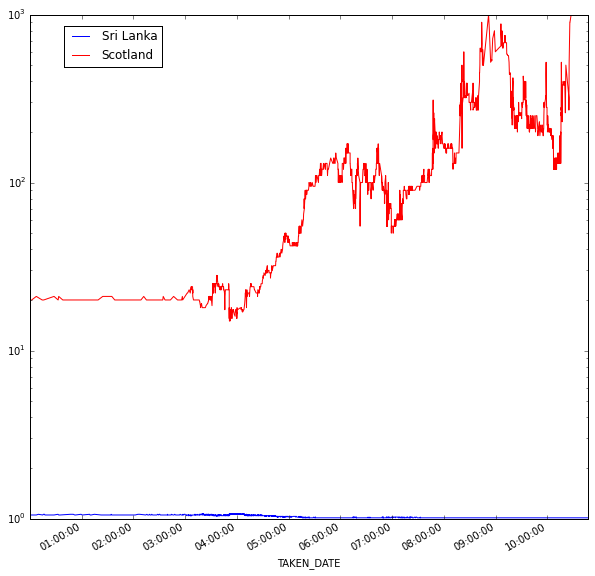

In [75]:
plot_odds_dynamics('Sri Lanka v Scotland', 'L', '2015-03-11')

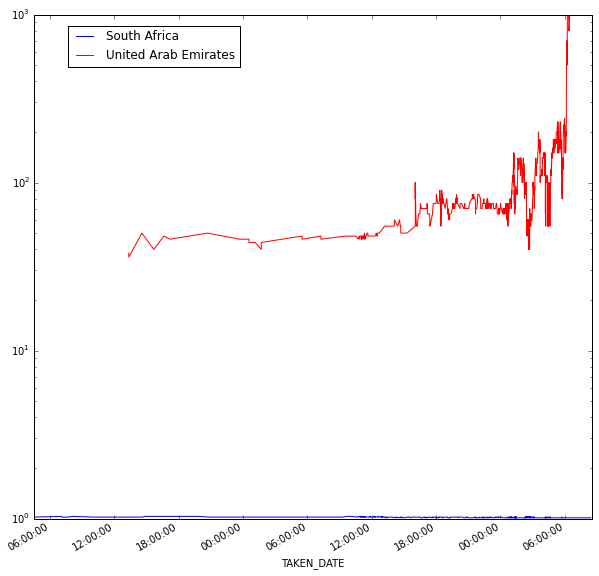

In [76]:
plot_odds_dynamics('South Africa v United Arab Emirates', 'L', '2015-03-10')

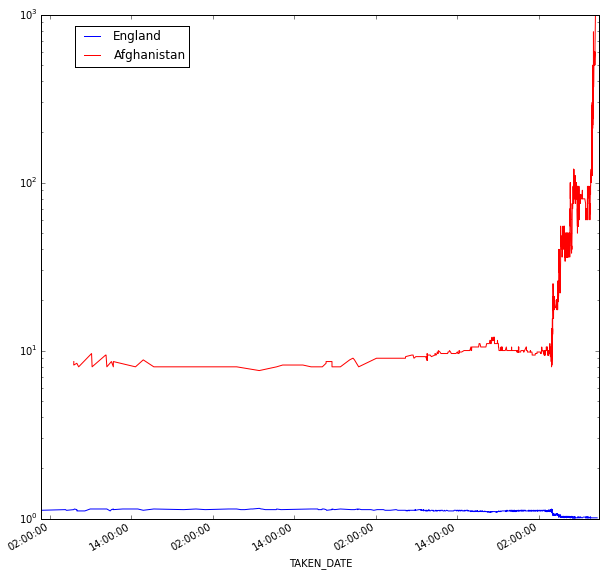

In [77]:
plot_odds_dynamics('England v Afghanistan', 'L', '2015-03-10')

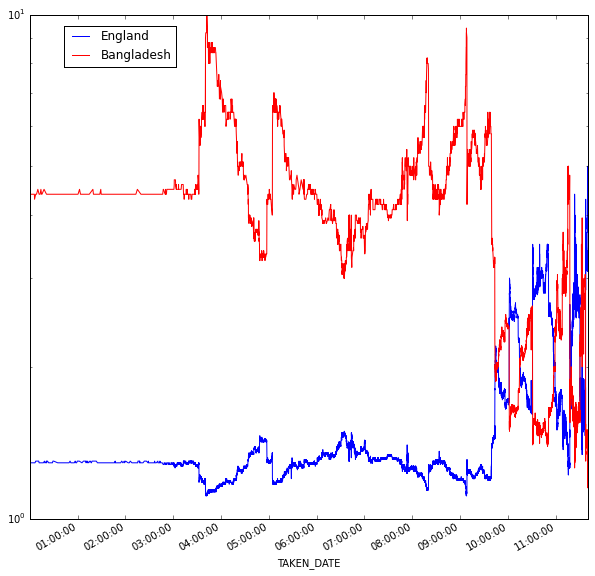

In [79]:
plot_odds_dynamics('England v Bangladesh', 'L', '2015-03-09')

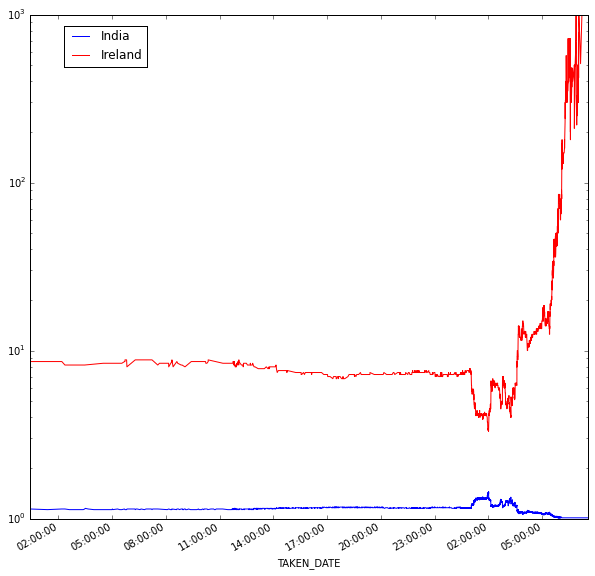

In [80]:
plot_odds_dynamics('India v Ireland', 'L', '2015-03-09')

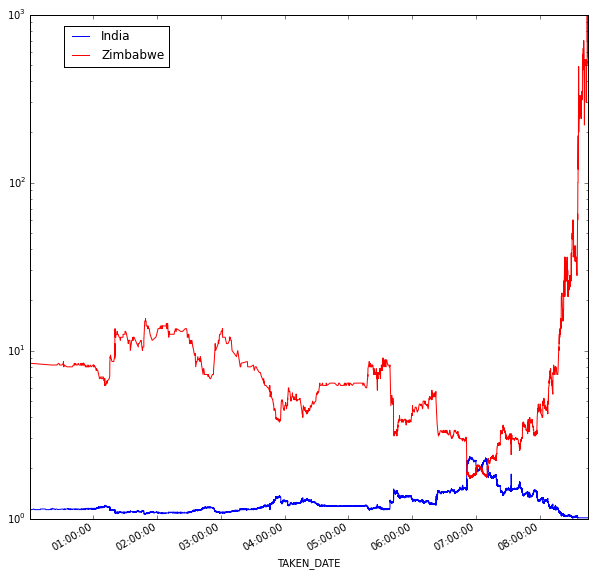

In [85]:
plot_odds_dynamics('India v Zimbabwe', 'L', '2015-03-14')

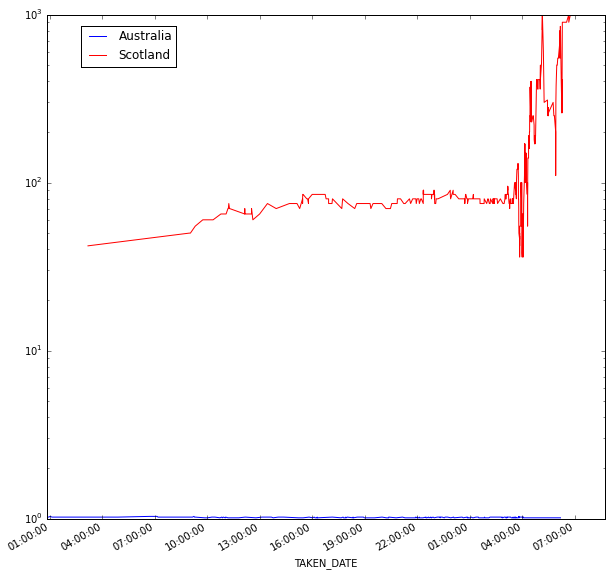

In [86]:
plot_odds_dynamics('Australia v Scotland', 'L', '2015-03-13')

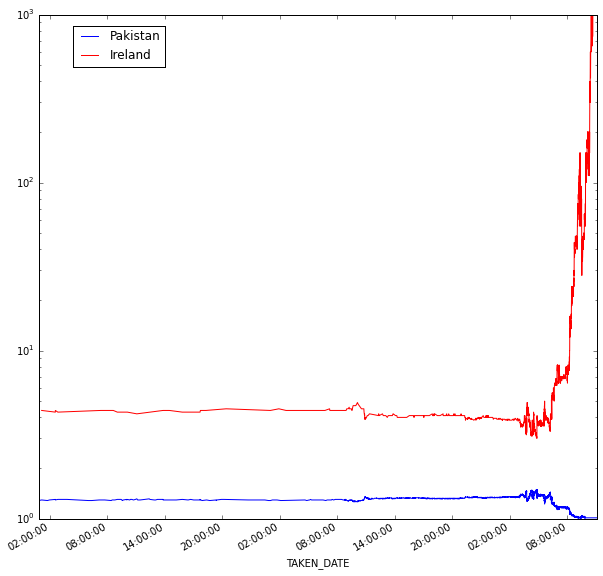

In [87]:
plot_odds_dynamics('Pakistan v Ireland', 'L', '2015-03-13')

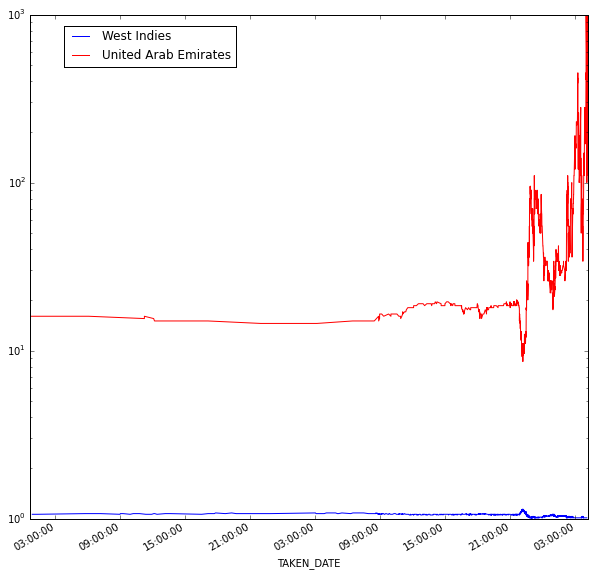

In [88]:
plot_odds_dynamics('West Indies v United Arab Emirates', 'L', '2015-03-13')

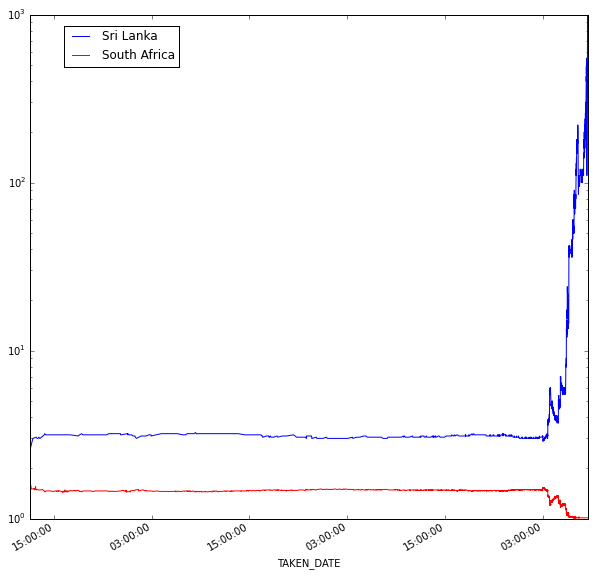

In [89]:
plot_odds_dynamics('Sri Lanka v South Africa', 'L', '2015-03-13')

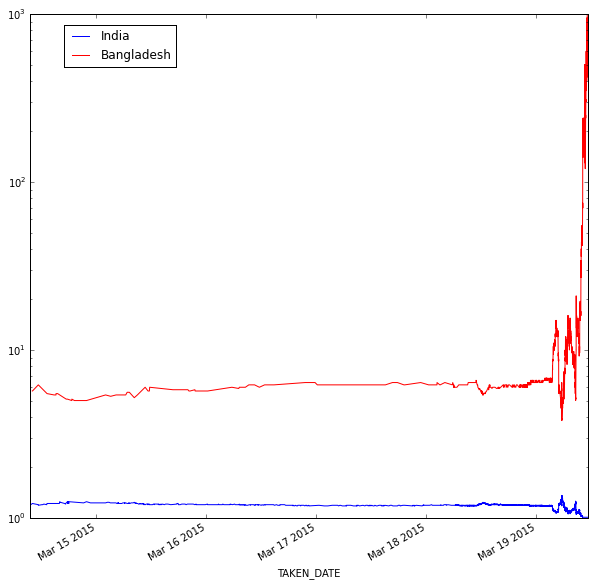

In [90]:
plot_odds_dynamics('India v Bangladesh', 'L', '2015-03-13')

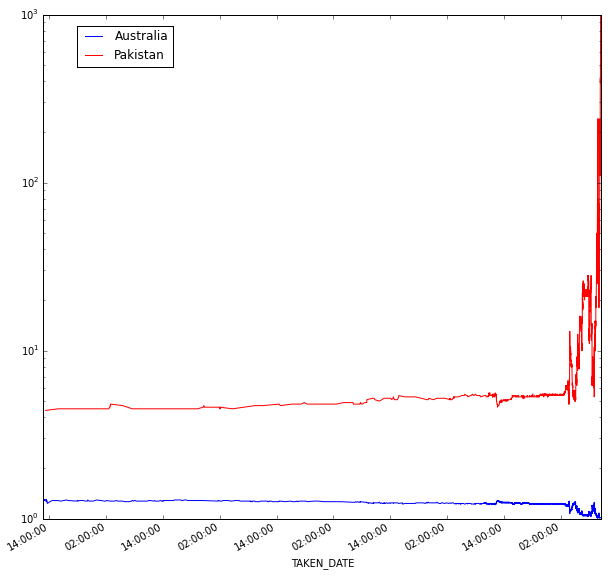

In [91]:
plot_odds_dynamics( 'Australia v Pakistan',  'L', '2015-03-15')

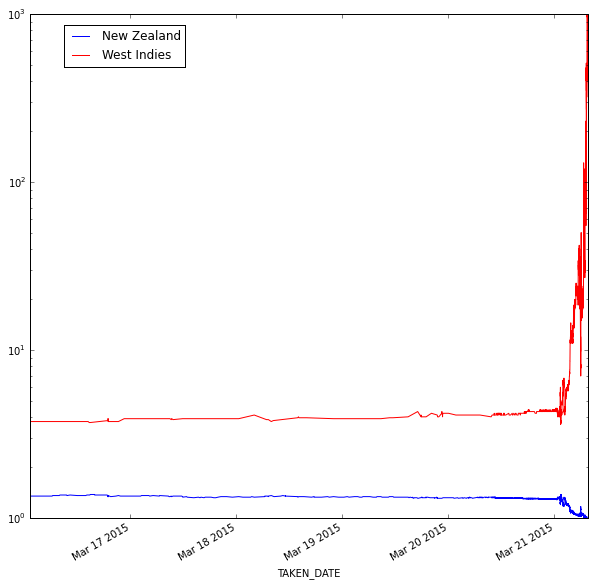

In [92]:
plot_odds_dynamics('New Zealand v West Indies', 'L', '2015-03-16')